#### Buck Controller Design

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import control as co 

In [86]:
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12

#### Plant features

In [87]:
wesr = 10e6

w0 = 123e3

d = 0.025

Kp = 1

#### Controller features

In [88]:
K = 1e6

wz1 = w0
wz2 = w0
wp1 = 3.77e6
wp2 = wesr

#### Transfer functions

In [89]:
Gds = co.tf([Kp*1/wesr, Kp], [1/w0**2, 2*d/w0, 1])

Gds

TransferFunction(array([1.e-07, 1.e+00]), array([6.60982220e-11, 4.06504065e-07, 1.00000000e+00]))

In [90]:
Gr1 = co.tf([K], [1,0])

Gr2 = co.tf([1/wz1, 1], [1/wp1, 1])

Gr3 = co.tf([1/wz2, 1], [1/wp2, 1])

Gr = Gr1*Gr2*Gr3

Gr

TransferFunction(array([6.60982220e-05, 1.62601626e+01, 1.00000000e+06]), array([2.65251989e-14, 3.65251989e-07, 1.00000000e+00, 0.00000000e+00]))

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

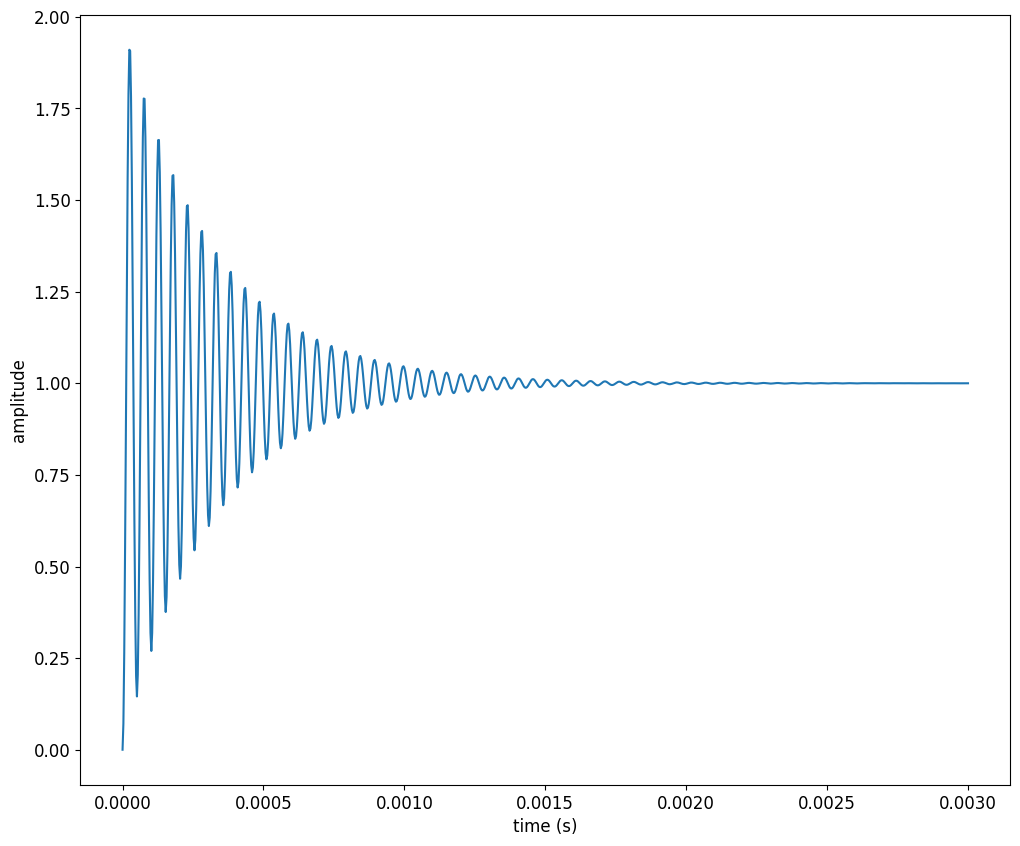

In [91]:
t = np.linspace(0, 0.003, 1000)

t1,y1 = co.step_response(Gds,t)

plt.plot(t1, y1)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

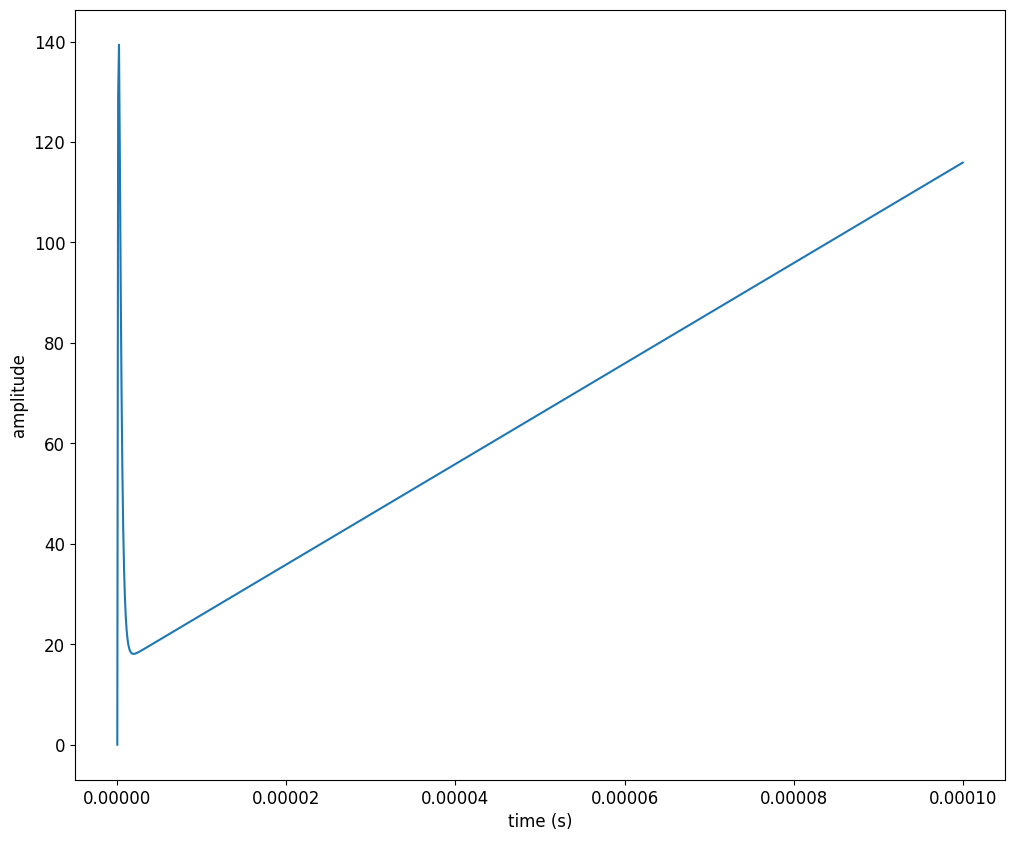

In [92]:
t = np.linspace(0, 0.0001, 1000)

t1,y1 = co.step_response(Gr,t)

plt.plot(t1, y1)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid

#### Bode plots

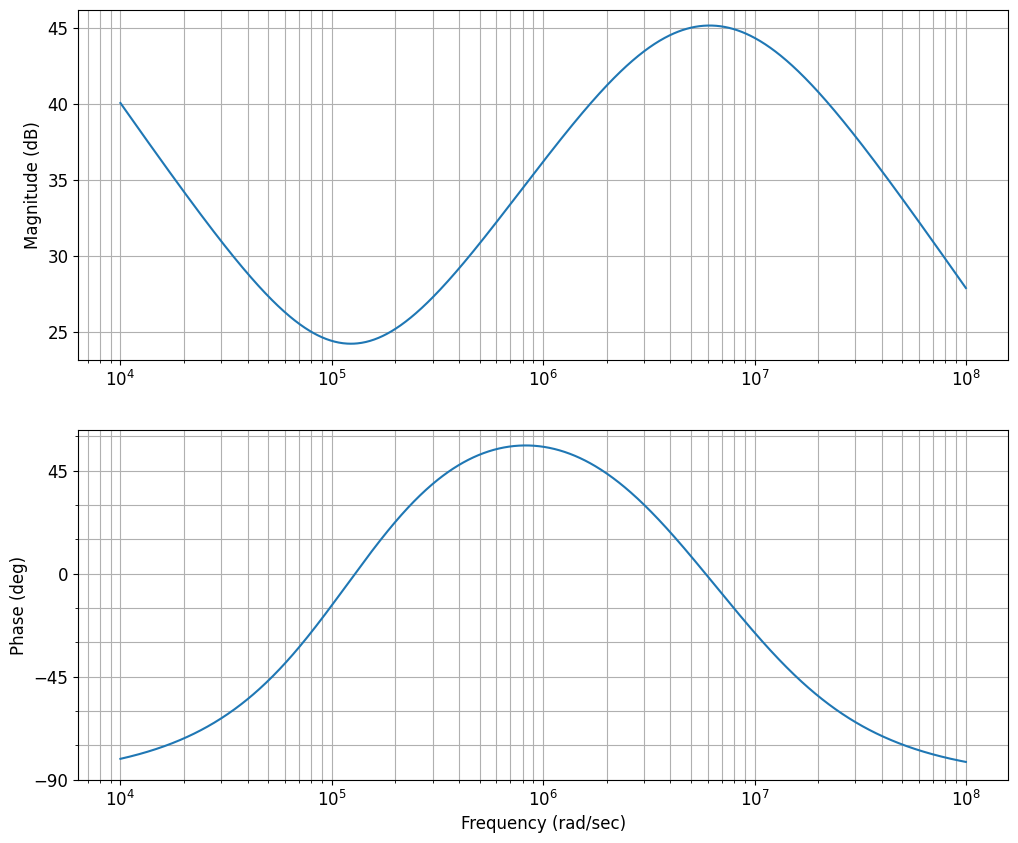

In [93]:
# Controller bode plot

mag, phase, omega = co.bode_plot(Gr, dB = True)

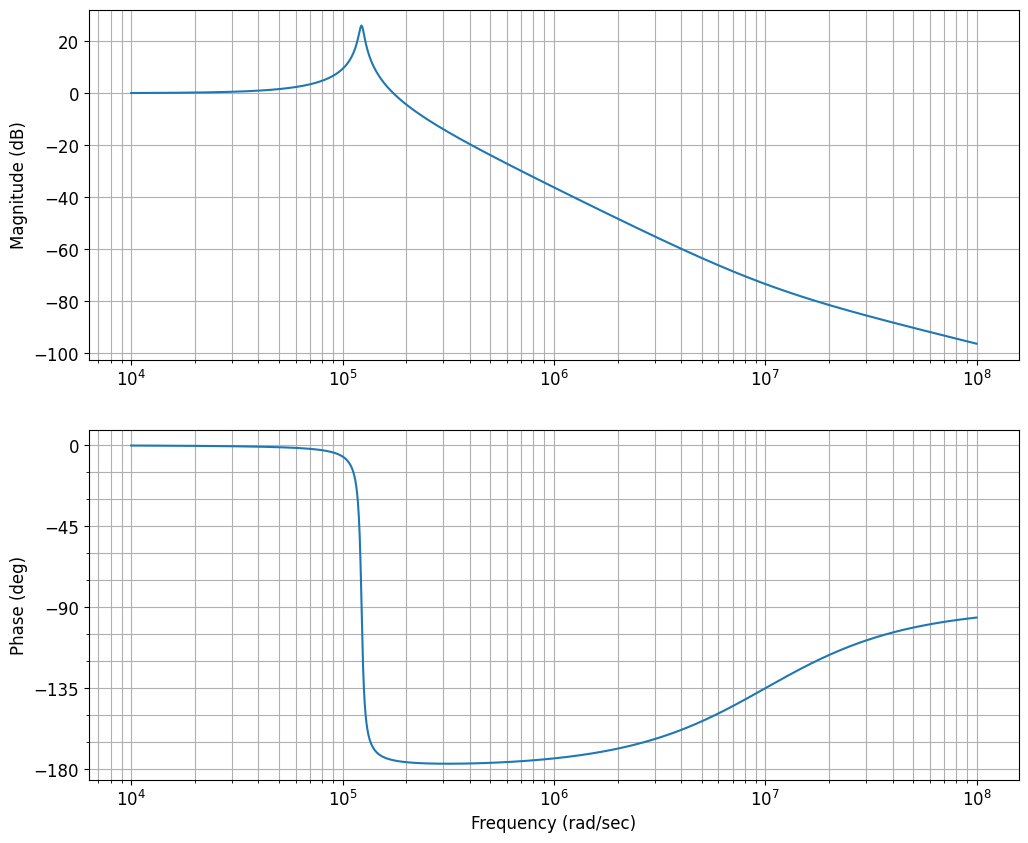

In [94]:
# Plant bode plot

mag, phase, omega = co.bode_plot(Gds, dB = True)

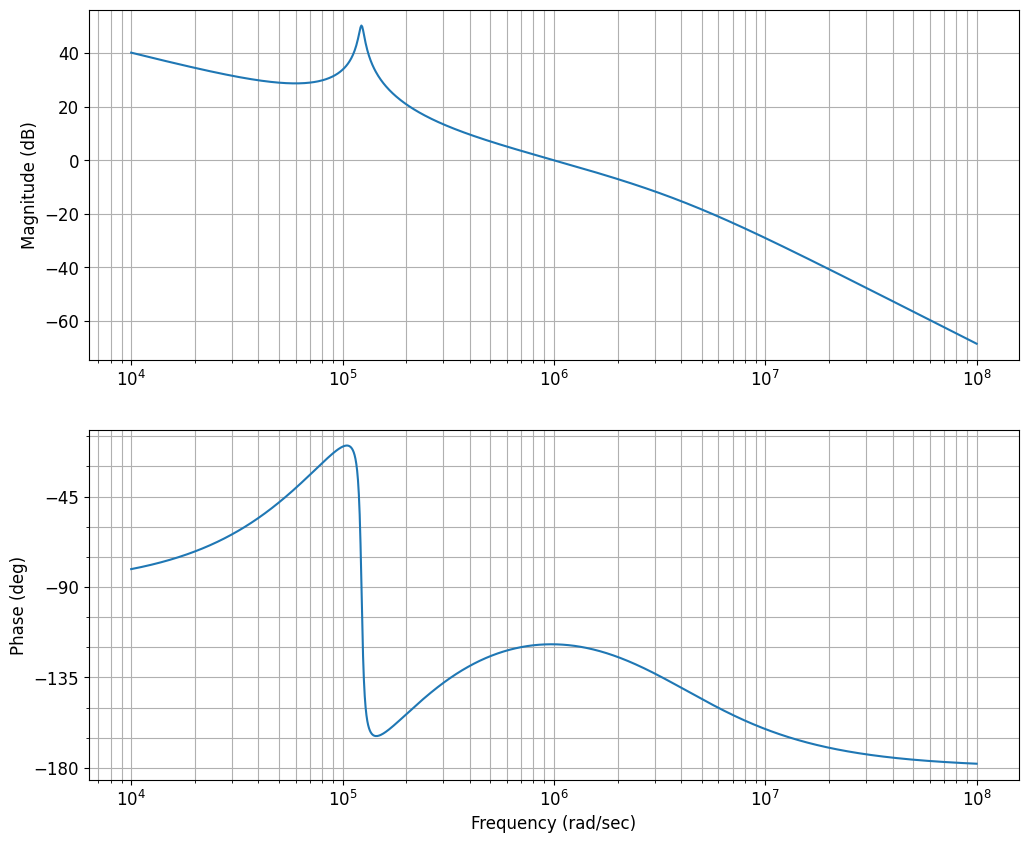

In [95]:
# Open Loop Bode Plot

G0 = Gr*Gds

mag, phase, omega = co.bode_plot(G0, dB = True)

#### Final step response

c:\Users\donca\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\matfuncs.py:709: LinAlgWarning: Ill-conditioned matrix (rcond=8.04293e-41): result may not be accurate.
  return solve(Q, P)


<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

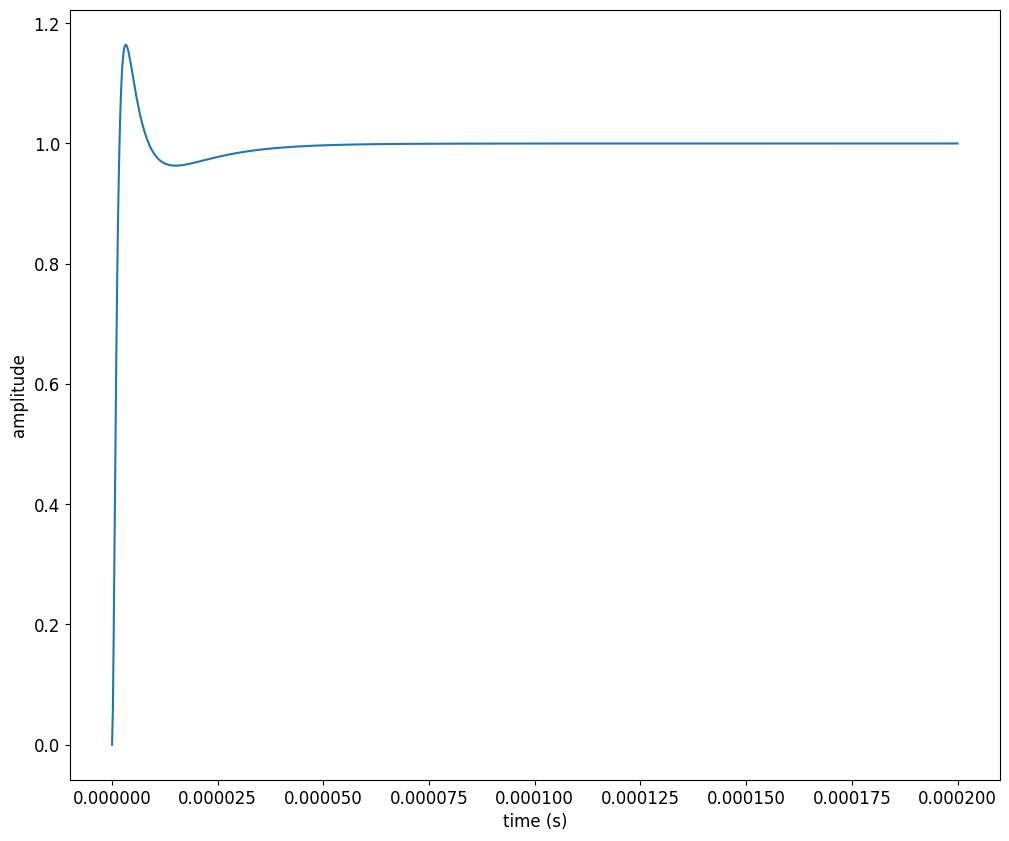

In [96]:
Gc = co.feedback(G0)

t = np.linspace(0, 0.0002, 1000)

t1,y1 = co.step_response(Gc,t)

plt.plot(t1, y1)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid

c:\Users\donca\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\matfuncs.py:709: LinAlgWarning: Ill-conditioned matrix (rcond=8.04293e-41): result may not be accurate.
  return solve(Q, P)


<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

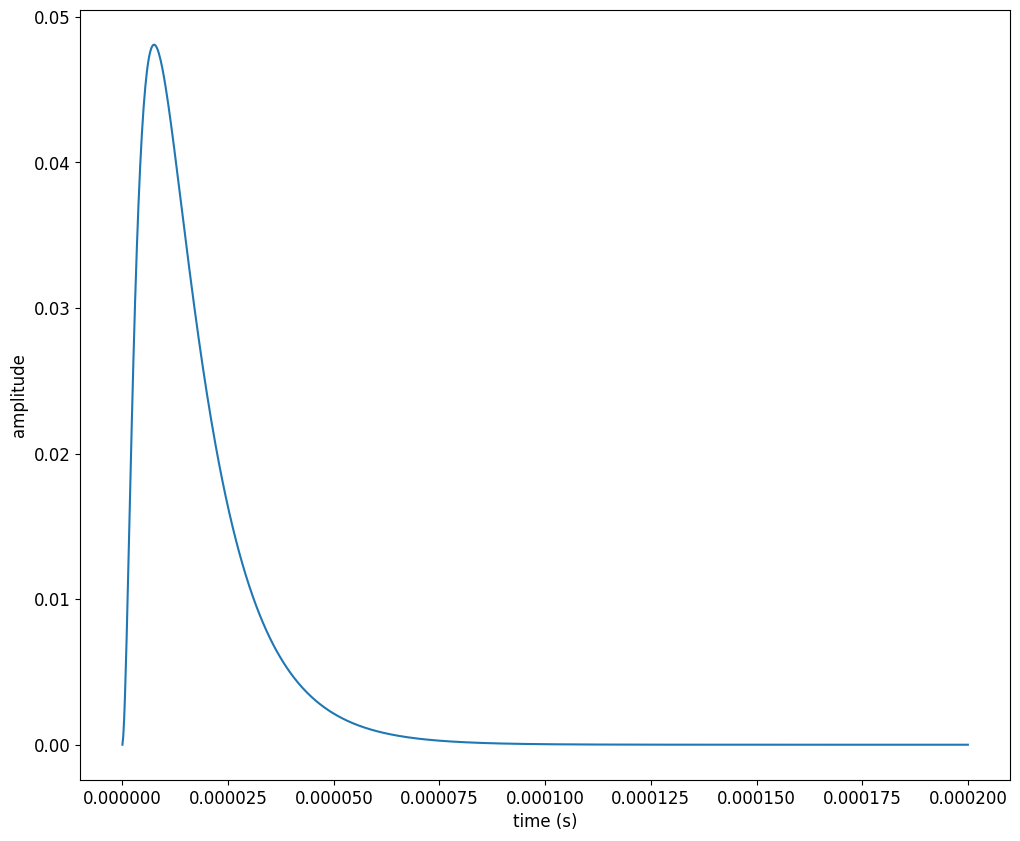

In [97]:
Gc = co.feedback(Gds, Gr)

t = np.linspace(0, 0.0002, 1000)

t1,y1 = co.step_response(Gc,t)

plt.plot(t1, y1)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid